# Analyzing Student Graduation Rates for Predictive Purposes

**Name**: Quinn O'Rourke

## 1. Introduction and Dataset Research

#### Problem Statement and Motivation:

Over the last decade, one of the most important fields data science/analytics has begun to make a positive impact in is education. While total college enrollment over the last decade has been some of the largest in human history (even going by per capita)(1), college graduation rates have continued to trend downward. In order for schools to help students succeed as much as possible, they need to understand what is causing more students to dropout, which is where predictive analytics has perfectly come into play.

Georgia State is one of the growing numbers of schools that is trying to use big data to identify the factors that make student struggle in order to better help then and therefore increase their graduation rates (2). Struggling with high dropout numbers results in a worse reputation for these smaller, "less elite" schools and overall leads to lower enrollment and less funds, and so many have turned to predictive analytics. 

But in the pursuit of better predicting what types of students are more likely to dropout so they can address the problem, the reinforcement of racial, gender, and other demographic inequalities has been deeply impactful. In the example of Georgia State, which used to be majority minority, using unfair predictive models to determine if a student they accepted/kept was going to graduate led to them accepting less diversity and equality in the pursuit of better graduation numbers. If these predictions aren't as fair and effective as possible, the actions taken based on them may have significant negative impacts to students as well as to the colleges' reputations as diverse/unjudgemental institutions.

Given this scenario, the most important values to consider when it comes to designing a predictive model for student graduation success is effectiveness and fairness. Without an effective model, the causes of students struggle will continue to go unnotice and action won't be taken to help students who may need it. And without a fair model, students will face deep discrimination issues and may even end up being rejected from schools they would have thrived in. There are tradeoffs and a balance in making a model that fulfills both these values, as a more effective/accurate model may not be as fair of a model and vice versa. We need to take all this into account when building our model and be assured that the model is adequately effective and fair. 

In determining effectiveness, I will be using the some typical summary statistics (tpr, tnr, accuracy) and for evaluating fairness I will be using statistical parity, particularly the statistical parity rate difference as its best for measuring the positive outcomes between groups and focuses on group-level fairness, both of which is appropriate for our problem since we want to maximize graduation rates (positive outcomes) and make it fair for people of all demographics, especially in regards to the very real issue of men having lower rates vs women (group-level fairness)(3). 

Sources:

1.) College enrollments demographic data: https://educationdata.org/college-enrollment-statistics

2.) Article on predictive analytics in helping college graduation rates: https://hechingerreport.org/predictive-analytics-boosting-college-graduation-rates-also-invade-privacy-and-reinforce-racial-inequities/

3.) Article on men having much lower graduation rate vs women: https://www.brookings.edu/blog/up-front/2021/10/08/the-male-college-crisis-is-not-just-in-enrollment-but-completion/

#### Dataset Information

The dataset I will be using for this analysis is from the academic paper "Predicting Student Dropout and Academic Success" by Valentim Realinho, Jorge Machado, Luís Baptista, and Mónica V. Martins in 2022. The dataset uses data collected on students from 2008 to 2009 at VALORIZA, a portugese institute from 17 of their undergraduate programs. I found the dataset originally on kaggle (both of these links are below). I will be using the kaggle dataset and all its variables but will have to remove some as they don't fit our analysis such as curricular units, application model, parent's occupations, and nationality (since the study is in Portugal it's not reflective of the US plus the descriptions they use for races are very arbitrary in categorizing.

Dataset: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

Academic paper on dataset and how it was collected in full explanation: https://www.mdpi.com/2306-5729/7/11/146

#### Report Introduction

Given all this, I plan to create/use two predictive models in this report: the Fairness-aware classifier with prejudice remover regularizer model and the Weighted Logistic Regression model. They are best for dealing with this type of binary categorical prediction and accounting for fairness as well as accuracy.


## 2. Data Processing

#### Data Pre-Processing

Given the dataset is collected as a three-category classification (with Graduate, Dropout, and Enrolled), and given the fact we want to analyze what factors make a student dropout versus graduate and aren't necessarily sure whether currently enrolled students are going to dropout, we are going to remove all students that are currently enrolled.

There are also certain variables in the dataset that don't pertain completely to a student success/whether they continue their academic career or not. We will be removing these as well as some numerical variables that are too difficult to categorize accurately without some bias on the part of the research (such as which occupation for a parent is considered "better" than the other on a scale).

One final adjustment we need to make to the dataset before processing is in regards to the various categorical variables. The descriptions of what the different numbers mean for a column such as "Mother's qualification" are in the academic paper on the dataset but aren't in order of importance. We will be adjusting all these variables so as to properly analyze them

In [163]:
from aif360.datasets import StandardDataset
from aif360.metrics import  BinaryLabelDatasetMetric
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [164]:
df = pd.read_csv('studentsuccess.csv')
df[:10]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [165]:
students_df = df.drop(df[df["Target"] == "Enrolled"].index) # drop currently enrolled students

In [166]:
# Dropping all variables not needed to include in our analysis
students_df = students_df.drop("Curricular units 2nd sem (without evaluations)", axis=1)
students_df = students_df.drop("Curricular units 2nd sem (evaluations)", axis=1)
students_df = students_df.drop("Curricular units 2nd sem (credited)", axis=1)
students_df = students_df.drop("Curricular units 2nd sem (enrolled)", axis=1)
students_df = students_df.drop("Curricular units 2nd sem (approved)", axis=1)
students_df = students_df.drop("Curricular units 1st sem (without evaluations)", axis=1)
students_df = students_df.drop("Curricular units 1st sem (evaluations)", axis=1)
students_df = students_df.drop("Curricular units 1st sem (credited)", axis=1)
students_df = students_df.drop("Curricular units 1st sem (enrolled)", axis=1)
students_df = students_df.drop("Curricular units 1st sem (approved)", axis=1)
students_df = students_df.drop("Application mode", axis=1)
students_df = students_df.drop("Application order", axis=1)

# and dropping all variables too subjective to analyze without bias (and not too important in determing student success anyway)
students_df = students_df.drop("Mother's occupation", axis=1)
students_df = students_df.drop("Father's occupation", axis=1)
students_df = students_df.drop("Nacionality", axis=1) # international category covers most of what this gives us


In [167]:
students_df.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,13,10,1,0,0,1,1,0,20,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,3,1,0,0,0,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,Graduate
2,1,5,1,1,22,27,1,0,0,0,1,0,19,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
3,1,15,1,1,23,27,1,0,0,1,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,Graduate
4,2,3,0,1,22,28,0,0,0,1,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,Graduate


In [168]:
# And finally we will change the classification of categorical variables not ordered in importance so we can analyze them properly
# See the article for what the different numbers mean, will be grouping them according to education level appropriately

students_df.loc[students_df["Mother's qualification"].isin([9,18,21,25,26,27,28]) , "Mother's qualification"] = "Basic"
students_df.loc[students_df["Mother's qualification"].isin([7,8,10,11,12,14,15,17,19,20]) , "Mother's qualification"] = "SomeHighSchool"
students_df.loc[students_df["Mother's qualification"].isin([1,30]), "Mother's qualification"] = "HighSchoolDegree"
students_df.loc[students_df["Mother's qualification"].isin([2,3,6]), "Mother's qualification"] = "CollegeDegree"
students_df.loc[students_df["Mother's qualification"].isin([4,5,33,34]), "Mother's qualification"] = "AdvancedDegree"
students_df.loc[students_df["Mother's qualification"].isin([16,23,29,31,32]), "Mother's qualification"] = "TechnicalDegree"
students_df.loc[students_df["Mother's qualification"].isin([13,22,24]), "Mother's qualification"] = "Other"

students_df.loc[students_df["Father's qualification"].isin([9,18,21,25,26,27,28]) , "Father's qualification"] = "Basic"
students_df.loc[students_df["Father's qualification"].isin([7,8,10,11,12,14,15,17,19,20]) , "Father's qualification"] = "SomeHighSchool"
students_df.loc[students_df["Father's qualification"].isin([1,30]), "Father's qualification"] = "HighSchoolDegree"
students_df.loc[students_df["Father's qualification"].isin([2,3,6]), "Father's qualification"] = "CollegeDegree"
students_df.loc[students_df["Father's qualification"].isin([4,5,33,34]), "Father's qualification"] = "AdvancedDegree"
students_df.loc[students_df["Father's qualification"].isin([16,23,29,31,32]), "Father's qualification"] = "TechnicalDegree"
students_df.loc[students_df["Father's qualification"].isin([13,22,24]), "Father's qualification"] = "Other"

students_df.loc[students_df["Previous qualification"].isin([12,13]), "Previous qualification"] = "Basic"
students_df.loc[students_df["Previous qualification"].isin([7,8,9,10,11]), "Previous qualification"] = "SomeHighSchool"
students_df.loc[students_df["Previous qualification"].isin([1]), "Previous qualification"] = "HighSchoolDegree"
students_df.loc[students_df["Previous qualification"].isin([2,3,15]), "Previous qualification"] = "CollegeDegree"
students_df.loc[students_df["Previous qualification"].isin([4,5,6,17]), "Previous qualification"] = "AdvancedDegree"
students_df.loc[students_df["Previous qualification"].isin([14,16]), "Previous qualification"] = "Other"

students_df.loc[students_df["Course"].isin([2,14,15]), "Course"] = "MediaStudies"
students_df.loc[students_df["Course"].isin([3,5,10]), "Course"] = "SocialScience"
students_df.loc[students_df["Course"].isin([7]), "Course"] = "STEM"
students_df.loc[students_df["Course"].isin([1,4,8]), "Course"] = "Bio/Chem/ACES"
students_df.loc[students_df["Course"].isin([6,12,13]), "Course"] = "Medical/Nurse"
students_df.loc[students_df["Course"].isin([9,17]), "Course"] = "Business"
students_df.loc[students_df["Course"].isin([11,16]), "Course"] = "Other"

students_df.loc[students_df["Marital status"].isin([1]), "Marital status"] = "Single"
students_df.loc[students_df["Marital status"].isin([2]), "Marital status"] = "Married"
students_df.loc[students_df["Marital status"].isin([3,4]), "Marital status"] = "Divorced/Widowed"
students_df.loc[students_df["Marital status"].isin([5,6]), "Marital status"] = "Other"

# We will also be changing the binary classifcation target from categorical to numerical so we can fit it into our soon-to-be created model.

students_df.loc[students_df["Target"] == 'Graduate' , "Target"] = 1 #Coding 1 = Graduated, 0 = Dropout
students_df.loc[students_df["Target"] == 'Dropout' , "Target"] = 0

In [169]:
students_df[:10] # Here's our final dataset, ready for processing:

,Marital status,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,Single,MediaStudies,1,HighSchoolDegree,Other,SomeHighSchool,1,0,0,1,1,0,20,0,0.000000,0.000000,10.8,1.4,1.74,0
1,Single,Other,1,HighSchoolDegree,HighSchoolDegree,CollegeDegree,1,0,0,0,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,1
2,Single,SocialScience,1,HighSchoolDegree,Other,Basic,1,0,0,0,1,0,19,0,0.000000,0.000000,10.8,1.4,1.74,0
3,Single,MediaStudies,1,HighSchoolDegree,TechnicalDegree,Basic,1,0,0,1,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,1
4,Married,SocialScience,0,HighSchoolDegree,Other,Basic,0,0,0,1,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,1
5,Married,Business,0,Basic,Other,Basic,0,0,1,1,1,0,50,0,11.857143,11.500000,16.2,0.3,-0.92,1
6,Single,Medical/Nurse,1,HighSchoolDegree,Other,Basic,1,0,0,1,0,1,18,0,13.300000,14.345000,15.5,2.8,-4.06,1
7,Single,Other,1,HighSchoolDegree,Other,Basic,1,0,0,0,1,0,22,0,0.000000,0.000000,15.5,2.8,-4.06,0
8,Single,SocialScience,1,HighSchoolDegree,HighSchoolDegree,HighSchoolDegree,0,0,0,1,0,1,21,1,13.875000,14.142857,16.2,0.3,-0.92,1
9,Single,SocialScience,1,HighSchoolDegree,HighSchoolDegree,SomeHighSchool,1,0,1,0,0,0,18,0,11.400000,13.500000,8.9,1.4,3.51,0


I don't think any of these basic data processing decisions might have a significant ethical impact on any stakeholders involved. While we are missing out on possibly important datapoints from currently enrolled students and have removed some variables that could of shown a relation to creating a better model, having these inputs that we can't accurately and reliably control and therefore observe to see which are most important in trying to ethically lower college dropout rates would only hurt stakeholders. By doing this pre-processing, we can create a model that's far more explanable and useable for stakeholders. 


#### Training and Test Dataset

In [170]:
train_df, test_df = train_test_split(students_df, test_size=0.8, shuffle= True)
#display(train_df)
#display(test_df)

In [171]:
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

#### Potential Fairness Pre-Processing


While I wasn't planning on using a fairness pre-processing method, the narrowing down of these categorical variables to improve the model could of possibly impacted fairness but this is unlikely. This was more about reducing the complexity and less about reducing the bias of these multiple labels.


## 3. Basic Descriptive Analytics and Dataset Benchmarking

We are now going to perform some basic descriptive analytics on the database in order to better understand the data we're working with.

In [172]:
# Basic summary statistics for each variable:
students_df['Marital status'].value_counts()

Single              3199
Married              327
Divorced/Widowed      77
Other                 27
Name: Marital status, dtype: int64

In [173]:
students_df['Course'].value_counts()

Medical/Nurse    997
MediaStudies     695
SocialScience    691
Business         486
Other            353
Bio/Chem/ACES    302
STEM             106
Name: Course, dtype: int64

In [174]:
students_df['Daytime/evening attendance'].value_counts() # 1 = daytime attendence, 0 = evening attendence

1    3222
0     408
Name: Daytime/evening attendance, dtype: int64

In [175]:
students_df['Previous qualification'].value_counts()

HighSchoolDegree    3019
Other                192
CollegeDegree        178
Basic                155
SomeHighSchool        57
AdvancedDegree        29
Name: Previous qualification, dtype: int64

In [176]:
students_df["Mother's qualification"].value_counts()

Other               1623
HighSchoolDegree     865
TechnicalDegree      473
CollegeDegree        401
SomeHighSchool       188
AdvancedDegree        50
Basic                 30
Name: Mother's qualification, dtype: int64

In [177]:
students_df["Father's qualification"].value_counts()

Basic               1610
SomeHighSchool       837
HighSchoolDegree     737
CollegeDegree        265
Other                111
AdvancedDegree        50
TechnicalDegree       20
Name: Father's qualification, dtype: int64

In [178]:
students_df["Displaced"].value_counts() #1 = displaced, 0 = not displaced student

1    1993
0    1637
Name: Displaced, dtype: int64

In [179]:
students_df["Educational special needs"].value_counts() #1 = special needs, 0 = not special needs student

0    3590
1      40
Name: Educational special needs, dtype: int64

In [180]:
students_df["Debtor"].value_counts() #1 = debtor, 0 = not. This continues for all below values that are coded exclusively 0 or 1, where 1 is always yes and 0 is always no

0    3217
1     413
Name: Debtor, dtype: int64

In [181]:
students_df["Tuition fees up to date"].value_counts() 

1    3144
0     486
Name: Tuition fees up to date, dtype: int64

In [182]:
students_df["Gender"].value_counts() # 1 = male, 0 = female

0    2381
1    1249
Name: Gender, dtype: int64

In [183]:
students_df["Scholarship holder"].value_counts() 

0    2661
1     969
Name: Scholarship holder, dtype: int64

In [184]:
students_df["Age at enrollment"].describe() #numerical value not qualitiative, quanitiative summary stats below

count    3630.000000
mean       23.461157
std         7.827994
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

In [185]:
students_df["International"].value_counts() #international student = 1, 0 = not international

0    3544
1      86
Name: International, dtype: int64

In [186]:
students_df["Curricular units 1st sem (grade)"].describe()

count    3630.000000
mean       10.534860
std         5.057694
min         0.000000
25%        11.000000
50%        12.341429
75%        13.500000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

In [187]:
students_df["Curricular units 2nd sem (grade)"].describe()

count    3630.000000
mean       10.036155
std         5.481742
min         0.000000
25%        10.517857
50%        12.333333
75%        13.500000
max        18.571429
Name: Curricular units 2nd sem (grade), dtype: float64

In [188]:
students_df["Unemployment rate"].describe()

count    3630.000000
mean       11.630358
std         2.667652
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64

In [189]:
students_df["Inflation rate"].describe()

count    3630.000000
mean        1.231598
std         1.384911
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64

In [190]:
students_df["GDP"].describe()

count    3630.000000
mean       -0.009256
std         2.259986
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64

In [191]:
students_df["Target"].value_counts() # 1 if they graduated, 0 if they dropped out.

1    2209
0    1421
Name: Target, dtype: int64

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot: >

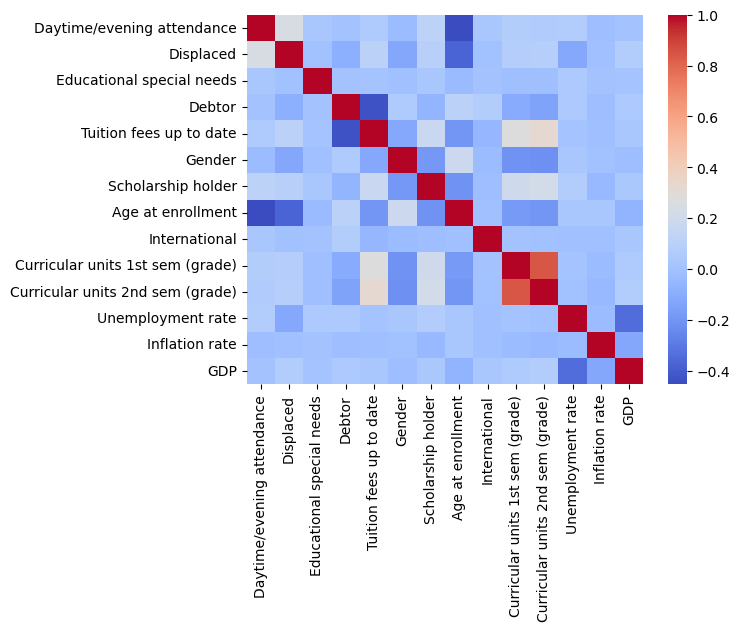

In [192]:
# Now let's see if there's any pairwise relationships between variables 
corr_matrix = students_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)

Above we can see the different summary statistics for all the variables and a correlation matrix between variables, which we can use to determine if there are any strong pairwise relationships between any of the variables. 

According to the matrix, there is a strong positive pairwise relationship between Curricular units 1st sem grade and Curricular units 2nd sem grade, which is the only strong positive pairwise relationship in the dataset. The reasoning for this is pretty obvious, if you have a high grade in one semester you're more likely to have a high grade in the next semester and vice versa. 

There seems to be strong negative correlations between Age at enrollment and Daytime/evening attendence as well as Age at enrollment and Displaced. This makes sense, as the older you are in enrollment the more likely you need to take classes at later times to accomidate your work/family life versus younger students. There was also a strong negative pairwise relationship between whether a student was a debtor and whether their tuition fees were paid up to date or not, which also makes sense as if you paid up you likely aren't a debtor and vice versa. The last negative correlation is one that is self evident and seen throughout multiple studies, which is the negative relationship between unemployment rate and GDP, which means when one goes up it's likely the other goes down since a lower unemployment rate usually indicated a better economy and therefore stronger GDP.

#### Statistical Parity

Looking at our data, we can calculate the statistical parity rate difference and the conditional statistical parity  on our one sensitive attribute: gender. The other variables in this dataset aren't necessarily sensitive, so we will be focusing on the fairness of gender in this analysis. Seeing as according to a lot of studies females have a higher graduation rate compared to males, especially in private schools, we will be considering them the priviledged class for the sake of analysis. 

We are also going to conduct conditional statistical parity with one of our legitimate categorical variables. There are a number to pick from, including Marital status, Previous qualification, Mother's qualification, etc (all have various different categorical labels that can be assigned legitimately), but I think "Course" would be the most interesting to look at so as to answer if the type of coursework you do could be an explaner for why a student would be more likely to dropout.

In [193]:
# Now let's calculate statistical parity. We need to remove string values for fairness metrics.
students_quant_only_sd = students_df.drop("Marital status", axis=1)
students_quant_only_sd = students_quant_only_sd.drop("Course", axis=1)
students_quant_only_sd = students_quant_only_sd.drop("Previous qualification", axis=1)
students_quant_only_sd = students_quant_only_sd.drop("Mother's qualification", axis=1)
students_quant_only_sd = students_quant_only_sd.drop("Father's qualification", axis=1)

# And now we can calculate fairness metrics
priv_group = [{'Gender': 0}]
unpriv_group = [{'Gender': 1}]

students_sd = StandardDataset(students_quant_only_sd, 
                          label_name='Target', 
                          favorable_classes=[1], 
                          protected_attribute_names=['Gender'], 
                          privileged_classes=[[0]])
#students_sd

In [194]:
students_fairness_metrics = BinaryLabelDatasetMetric(students_sd, unprivileged_groups = unpriv_group, privileged_groups = priv_group)

students_fairness_metrics.statistical_parity_difference()

-0.25885504707840196

In [195]:
# We can see the statistical parity rate difference calculated above, which we got -0.258855047. Here's some more fairness metrics to put in perspective:
students_fairness_metrics.disparate_impact()
students_fairness_metrics.consistency(n_neighbors=5)

array([0.81867769])

In [196]:
# Now onto the conditional statistical parity rate difference
legit_var = 'Course'
sens_var = 'Gender'
course_parity_diffs = []

for group in students_df['Course'].unique(): # need to loop over to do difference calc for each 'Course' type
    total_group_male = len(students_df[(students_df[sens_var] == 1) & (students_df[legit_var] == group)])
    total_group_female = len(students_df[(students_df[sens_var] == 0) & (students_df[legit_var] == group)])
    pos_group_male = len(students_df[(students_df[sens_var] == 1) & (students_df[legit_var] == group) & (students_df['Target'] == 1)])
    pos_group_female = len(students_df[(students_df[sens_var] == 0) & (students_df[legit_var] == group) & (students_df['Target'] == 1)])
    stat_parity_diff = abs(pos_group_male/total_group_male - pos_group_female/total_group_female)
    course_parity_diffs.append(stat_parity_diff)
    print(group)
    print(stat_parity_diff)
    

MediaStudies
0.1305263692198365
Other
0.0945909459094591
SocialScience
0.21027457716071474
Business
0.24980936403843224
Medical/Nurse
0.21666666666666667
Bio/Chem/ACES
0.15585851142225504
STEM
0.14


We can see above the conditional statistical parity rate differences for each of the possible 'Course' values, with 'Business' having the highest at .2498 and 'Other' having the lowest at .0946. 

#### Proxy Variables

As I explained above in regards to the correlation matrix, there are only a few variables that have any sort of pairwise relationships between them, all of them explained fairly well by the fact they are similar in nature and/or have simple logic to explain why they interact the way they do. Given we don't want gender to be a factor in whether we are determining if a student will dropout or not as that can be very unfair if misused, that is a possible proxy, which we will be further investigating later on, and there is a possibility marital status is closely related to the age and therefore a proxy.

## 4. Predictive Models Motivation


I want models that, taking into account a single sensitive attribute (gender) and multiple qualitiative/quantitative variables, can most accurately and fairly predict whether a student will graduate or dropout. Given this, the two predictive models I intend to use on this dataset are the Fairness-aware classifier with prejudice remover regularizer model and the Weighted Logistic Regression model.

Both of these models are able to take most of the variables from the dataset in a quick and efficient manner while also taking into account the relevant values stakeholders have for our initial problem in the introduction research. While the way they determine fairness is very different, both aim to try to make accurate predictions while also taking into account sensitive attributes (Gender) and adjusting themselves so as not to make unfair predictions based on discrimination/students demographics only. As we discussed in the intro and cited, men college graduation rates are much lower than womens for a variety of reasons and so we need to make sure our model isn't discriminating against men (or women if our results find that) simply for their gender, as that could result in the model rejecting new applicants based on gender in fear they'll bring the graduation rate down which is unfair to students and would ruin the college's reputation/ethics.


## 5. Predictive Model 1 - Fairness-aware classifier with prejudice remover regularizer

For the Fairness-aware classifier model, we need to use StandardDataset objects, which require only numerical variables in them. Therefore, we will be removing all qualitative/string-based variables for this model. 

In [197]:
test_quant_only_sd = test_df.drop("Marital status", axis=1)
test_quant_only_sd = test_quant_only_sd.drop("Course", axis=1)
test_quant_only_sd = test_quant_only_sd.drop("Previous qualification", axis=1)
test_quant_only_sd = test_quant_only_sd.drop("Mother's qualification", axis=1)
test_quant_only_sd = test_quant_only_sd.drop("Father's qualification", axis=1)

sd_test = StandardDataset(test_quant_only_sd, 
                          label_name='Target', 
                          favorable_classes=[1], 
                          protected_attribute_names=['Gender'], 
                          privileged_classes=[[0]])

train_quant_only_sd = train_df.drop("Marital status", axis=1)
train_quant_only_sd = train_quant_only_sd.drop("Course", axis=1)
train_quant_only_sd = train_quant_only_sd.drop("Previous qualification", axis=1)
train_quant_only_sd = train_quant_only_sd.drop("Mother's qualification", axis=1)
train_quant_only_sd = train_quant_only_sd.drop("Father's qualification", axis=1)

sd_train = StandardDataset(train_quant_only_sd, 
                          label_name='Target', 
                          favorable_classes=[1], 
                          protected_attribute_names=['Gender'], 
                          privileged_classes=[[0]])

In [198]:
from aif360.algorithms.inprocessing import PrejudiceRemover
from sklearn.linear_model import LogisticRegression

pr = PrejudiceRemover(sensitive_attr='Gender', class_attr='Target', eta=0.1).fit(sd_train)
sd_test_results = pr.predict(sd_test)
y_test_prob = sd_test_results.scores.ravel()
y_test_prob[0:10]

array([0.86207018, 0.82886129, 0.00888299, 0.90873163, 0.60837413,
       0.75500547, 0.86984884, 0.72032876, 0.72073094, 0.73132098])

This model will return a predicted probabilities of whether a certain student will graduate or dropout. To judge its effectiveness, I will be creating an ROC curve and getting the AUC, then trying out different thresholds in calculating the best statistical parity as well as the best tpr, tnr, and accuracy.

In [199]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_true=sd_test.labels, 
                            y_score=y_test_prob)
auc = roc_auc_score(y_true=sd_test.labels, 
                            y_score=y_test_prob)
auc

0.8933432334710744

In [200]:
results_list=[]

thresh_list = np.arange(0, 1, 0.01)

for threshold in thresh_list:
    
    test_df['y_pred'] = 1*(y_test_prob>threshold)

    df_test_priv=test_df[test_df['Gender']==0]
    df_test_unpriv=test_df[test_df['Gender']==1]
    percent_pos_1 = df_test_priv[df_test_priv['y_pred']==1].shape[0]/df_test_priv.shape[0]
    percent_pos_0 = df_test_unpriv[df_test_unpriv['y_pred']==1].shape[0]/df_test_unpriv.shape[0]
    stat_parity = percent_pos_0-percent_pos_1
    
    #3. Calculate the tpr and the tnr of the overall classification
    tn, fp, fn, tp = confusion_matrix(sd_test.labels, test_df['y_pred']).ravel()
    tpr = tp / (tp+fn)
    tnr = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    #4. Updating
    results_list.append([threshold,accuracy, tpr,tnr,stat_parity])
    
    
df_results = pd.DataFrame(results_list, columns=['threshold','accuracy', 'tpr','tnr','stat_parity'])    
df_results[:10]   

,threshold,accuracy,tpr,tnr,stat_parity
0,0.00,0.606061,1.000000,0.000000,0.000000
1,0.01,0.644284,0.999432,0.097902,-0.013730
2,0.02,0.666322,0.998864,0.154720,-0.027790
3,0.03,0.680096,0.998864,0.189685,-0.052472
4,0.04,0.692149,0.998295,0.221154,-0.061971
5,0.05,0.701102,0.997727,0.244755,-0.068582
6,0.06,0.710055,0.997159,0.268357,-0.073670
7,0.07,0.720041,0.996023,0.295455,-0.073081
8,0.08,0.728306,0.996023,0.316434,-0.080272
9,0.09,0.738636,0.995455,0.343531,-0.095446


In [201]:
df_results[df_results['accuracy']==df_results['accuracy'].max()]

,threshold,accuracy,tpr,tnr,stat_parity
43,0.43,0.835055,0.94375,0.667832,-0.216724


We now have a reliable model with various different thresholds to pick from in determing how high of a probability the model needs in order to be as accurate, efficient, and fair as possible. Given we don't want the model to just predict everyone to graduate or everyone to dropout but actually be effective, I will be setting the tpr and tnr to be over 0.5 so as to assure the model is as reliable as possible. From there, I will be focusing on the accuracy of the model since that is our top priority. Luckily, as we see in the code above, the most accurate threshold is a valid threshold accordingly to our metrics. Our model is complete and we have a great, reliable threshold that gets us to an accuracy of .83988 and can be used to reasonably reliable determine if a student's going to graduate or dropout.

## 6. Predictive Model 2 - Weighted Logistic Regression Model

Similar to how we started the predictive model 1, need to use StandardDataset objects, which require only numerical variables in them. Therefore, we will be using the df/standarddataset object that removed all qualitative/string-based variables for this model. First, we need to create the weights for each observation in the training data.

In [202]:
unpriv_group = [{'Gender':1}]
priv_group = [{'Gender':0}]

In [203]:
from aif360.algorithms.preprocessing import Reweighing

rw = Reweighing(unprivileged_groups = unpriv_group, privileged_groups = priv_group)
rw.fit(sd_train)
sd_train_reweight = rw.transform(sd_train)
sd_train_reweight.instance_weights[:10]

array([1.27803464, 1.35184914, 1.27803464, 0.70329139, 0.88166978,
       0.88166978, 1.27803464, 1.27803464, 0.70329139, 0.70329139])

In [204]:
df_train_weighted = train_df.copy()
df_train_weighted['Weight'] = sd_train_reweight.instance_weights
df_train_weighted.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,...,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target,Weight
1420,Single,Other,1,HighSchoolDegree,Other,Basic,1,0,0,1,...,0,18,0,11.800000,11.400000,10.8,1.4,1.74,0,1.278035
3353,Single,MediaStudies,1,HighSchoolDegree,TechnicalDegree,HighSchoolDegree,1,0,0,1,...,1,18,0,12.714286,11.833333,13.9,-0.3,0.79,1,1.351849
1797,Single,Medical/Nurse,1,HighSchoolDegree,TechnicalDegree,HighSchoolDegree,1,0,0,1,...,1,18,0,15.000000,11.666667,9.4,-0.8,-3.12,0,1.278035
1379,Single,SocialScience,1,HighSchoolDegree,HighSchoolDegree,HighSchoolDegree,0,0,0,1,...,0,22,0,0.000000,0.000000,11.1,0.6,2.02,0,0.703291
1485,Single,SocialScience,1,HighSchoolDegree,Other,HighSchoolDegree,1,0,0,1,...,1,19,0,10.750000,11.500000,15.5,2.8,-4.06,1,0.881670


In [205]:
df_train_weighted[['Gender','Target','Weight']].drop_duplicates()

,Gender,Target,Weight
1420,0,0,1.278035
3353,1,1,1.351849
1379,1,0,0.703291
1485,0,1,0.881670


We can see above the created weights for each combination, where our model will best-fit males that graduate but will least-best-fit males who dropout. In other words, the model will weighed in that way that pays closer attention to men who graduate and women who dropout in the hopes that it will make for more fair and accurate predictions. Let's fit the Logisitic Regression model based on these weights.

In [206]:
X_train = train_quant_only_sd.drop('Target', axis=1)
y_train = train_quant_only_sd['Target']

X_test = test_quant_only_sd.drop('Target', axis=1)
y_test = test_quant_only_sd['Target']

y_train=y_train.astype('int')

lr = LogisticRegression()
lr.fit(X_train, y_train, sample_weight = sd_train_reweight.instance_weights)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [207]:
y_test_predicted=lr.predict(X_test)
y_test_predicted

array([1, 1, 0, ..., 0, 1, 0])

This model automatically returns a 0 or 1 binary prediction classification, as seen in the array created above. To determine the effectiveness of our newly created model, we will be evaluating it based on the fairness-related metric statistical parity rate difference and the accuracy-related metrics tpr, tnr, and accuracy.

In [210]:
tn, fp, fn, tp = confusion_matrix(test_quant_only_sd['Target'].astype('int'), y_test_predicted).ravel()

tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(tpr)
print(tnr)
print(accuracy)

0.9278409090909091
0.6774475524475524
0.8292011019283747


In [209]:
test_df['y_pred2'] = y_test_predicted
df_test_priv=test_df[test_df['Gender']==0]
df_test_unpriv=test_df[test_df['Gender']==1]

percent_pos_1_2 = df_test_priv[df_test_priv['y_pred2']==1].shape[0]/df_test_priv.shape[0]
percent_pos_0_2 = df_test_unpriv[df_test_unpriv['y_pred2']==1].shape[0]/df_test_unpriv.shape[0]
stat_parity2 = percent_pos_1_2-percent_pos_0_2
stat_parity2

0.17488681942109474

We now have another model that has its benefits and drawbacks by it being a logistic model with custom made weights that should create more accurate and fair results. Our model is complete and we have consistent results that gets us to an accuracy of .84125 and stat parity of .19537 and can be used to reasonably reliable determine if a student's going to graduate or dropout.

## 7. Model Evaluation and Discussion

#### Model Explanability

Of these two main predictive models I fit, the Fairness-aware classifier with prejudice remover regularizer and the Weighted Logistic Regression Model, the Weighted Logistic Regression model has better explanability. While the fairness-aware classifier incorporates complicated regularization techniques that aren't very transparent or simple, the Weighted Logistic Regression model uses logistic regression, which is a simple and easily interpretable algorithm. It's also far easier to understand how the model uses its analysis to create weights and apply those weights to its predictions, while in the fairness-aware classifier it's not exactly clear how it is making the model more "fair". 

#### Fairness vs Accuracy Tradeoff

The tradeoff between the two models is seen in analysis in the previous parts of this paper. The accuracy metrics are better in the Weighted Logistic Regression model even compared to the best possible threshold in the Fairness-aware classifier, with a somewhat better accuracy of .84125 versus .83988 and much higher tpr/tnr numbers. In this best case scenario for accuracy in the Fairness-aware classifier model however, the fairness metrics (statistical parity rate difference) are much worse versus the Weighted Logistic Regression model (.19537 vs .286). All of that considered, if we want the most accurate model, it is clearly the Weighted Logistic Regression model.

However, the fairness tradeoff depending on the threshold we set for the Fairness-aware classifier could be massive. According to the threshold stats table in part 5, we can get a much lower statistical parity rate difference, and therefore likely more fairness, at a thresholds like 0.12, which would lower the accuracy to around 79 but decrease the statistical parity rate difference to 0.15. We can get the stat parity to even lower numbers depending on how low of accuracy we're willing to tolerate. All of this considered, if we want to maximize fairness, the Fairness-aware classifier with prejudice remover regularizer model is the best.

In regards to different classifications from either of the given models, the predictive probability-related predictions were far more effective in both accuracy and fairness and therefore were used in both. As discussed above, the threshold selected in the Fairness-aware classifier with prejudice remover regularizer model can also be adjusted in different ways to have better fairness or better accuracy (but none that maximize both). 

#### Selecting and Explaining Classification Options to a Layperson

One of the classification options based on my models was the fairness-aware classification (especially in the Fairness-aware classifier model). I decided to go with two possible thresholds as described above, .12 and .43, due to their balance of fairness and accuracy and their high accuracy respectively. While the actual process for getting the summary statistics used to make the decision on these thresholds is difficult to explain to a non-data scientist, the decisions themselves are simply based on whether you want the model to be more accurate or more fair. I would explain it to stakeholders that they need to decide on how important it is the predictions in the model are fair versus how important it is they're accurate or if it's somewhere inbetween.


## 8. Conclusion and Insights Summary


In summary, my report found that we can make an accurate model that is both reasonably accurate in determing what students and what factors lead to students dropping out versus graduating and develop two great models that could help small colleges like Georgia Tech identify actionable ways to increase their student graduation rate and help their students succeed. Based on their goals, the best model for whatever specific problem could change, but based on the above analysis I would reccomend these colleges use the Weighted Logistic Regression model as it's easily explainable how it predicts its results (which was a problem in the Georgia Tech case) while still being pretty fair and very accurate. By implementing a model like this, I believe Georgia Tech could continue to remain a diverse and fair college while also being able to create actionable ideas based off the models predictions so as to improve graduation rates.

There are plenty of avenues for future work here, and I'm sure there's multiple big data companies on it right now. The apparent problem is the dataset is only from a Portugese university and I wonder if the same model/same conclusons could be drawn from an American university or other places around the world too, so increases the scope of the study could be really helpful. I'm also curious how race as a sensitive attribute could come into play, so I would look to run a new study that focuses on collecting that information effectively. Of course, there's plenty of other issues these smaller colleges faces especially in regards to fairness that we could build similar predictive models for, such as whether someone should be admitted to the college etc. 

This research was really exciting and led to some solid conclusions/insights and interesting paths forward for future work. With enough support, monetary and social, we could help these struggling smaller colleges and their students continue to improve and educate.
